# Recovery of gold from ore

Prepare a prototype of a machine learning model for Digital. The company develops solutions for the efficient operation of industrial enterprises.

The model must predict the recovery rate of gold from gold ore. Use data with mining and purification parameters.

The model will help optimize production so as not to launch an enterprise with unprofitable characteristics.

Work plan:

1. Prepare data;
2. Conduct exploratory data analysis;
3. Build and train the model.



# Technological process

1. Flotation
A mixture of gold ore is fed into the flotation unit. After enrichment, a rough concentrate and “waste tailings” are obtained, that is, the remains of a product with a low concentration of valuable metals.
The stability of this process is affected by the inconsistent and non-optimal physico-chemical state of the flotation pulp (a mixture of solid particles and liquid).
2. Cleaning
The rough concentrate undergoes two purifications. The output is a final concentrate and new tailings.

# Data Description

<u>*Technological process*<u/>
    
Rougher feed
Rougher additions (or reagent additions) — Xanthate, Sulphate, Depressant
Xanthate — promoter or flotation activator;
Sulphate — in this production sodium sulfide;
Depressant — sodium silicate.
Rougher process — flotation
Rougher tails
Float banks
Cleaner process
Rougher Au - flotation gold concentrate
Final Au - final gold concentrate
    
Stage parameters
air amount
fluid levels
feed size — raw material granule size
feed rate

# Quality Metric

The sMAPE metric is calculated like this:
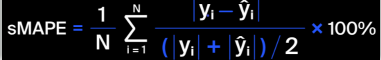

We need to predict two quantities at once:

efficiency of rough concentrate enrichment rougher.output.recovery;
final concentrate enrichment efficiency final.output.recovery.

The final metric consists of two values:

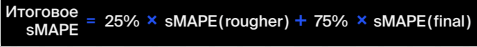

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Concentration-of-metals-at-different-stages" data-toc-modified-id="Concentration-of-metals-at-different-stages-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Concentration of metals at different stages</a></span></li><li><span><a href="#Comparison-of-the-sizes-of-raw-material-granules-on-the-training-and-test-set" data-toc-modified-id="Comparison-of-the-sizes-of-raw-material-granules-on-the-training-and-test-set-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Comparison of the sizes of raw material granules on the training and test set</a></span></li><li><span><a href="#Total-concentration-of-metals-at-various-stages" data-toc-modified-id="Total-concentration-of-metals-at-various-stages-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Total concentration of metals at various stages</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Preparing-of-dataframes-for-forecasting" data-toc-modified-id="Preparing-of-dataframes-for-forecasting-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Preparing of dataframes for forecasting</a></span></li><li><span><a href="#Function-for-sMAPE-and-Final-sMAPE" data-toc-modified-id="Function-for-sMAPE-and-Final-sMAPE-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Function for sMAPE and Final sMAPE</a></span></li><li><span><a href="#Building-and-training-models-on-training-data" data-toc-modified-id="Building-and-training-models-on-training-data-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Building and training models on training data</a></span><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-3.0.3.1"><span class="toc-item-num">3.0.3.1&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Test-sample" data-toc-modified-id="Test-sample-3.0.3.2"><span class="toc-item-num">3.0.3.2&nbsp;&nbsp;</span>Test sample</a></span></li><li><span><a href="#Checking-the-model-for-adequacy" data-toc-modified-id="Checking-the-model-for-adequacy-3.0.3.3"><span class="toc-item-num">3.0.3.3&nbsp;&nbsp;</span>Checking the model for adequacy</a></span></li></ul></li></ul></li></ul></li></ul></div>

## Data preparation

In [1]:
#download the libraries
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from numpy.random import RandomState
from scipy import stats as st
import seaborn as sns
from sklearn.dummy import DummyRegressor

In [2]:
#download data for research
try:
    df_tr = pd.read_csv('gold_industry_train.csv')
    df_te = pd.read_csv('gold_industry_test.csv')
    df_fu = pd.read_csv('gold_industry_full.csv')
except:
    df_tr = pd.read_csv('C:/Users/hp/Documents/data_science/GitHub/Yandex_project/Датасеты/gold_industry_train.csv')
    df_te = pd.read_csv('C:/Users/hp/Documents/data_science/GitHub/Yandex_project/Датасеты/gold_industry_test.csv')
    df_fu = pd.read_csv('C:/Users/hp/Documents/data_science/GitHub/Yandex_project/Датасеты/gold_industry_full.csv')

In [3]:
# output the training sample
display(df_tr.head())

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [4]:
# display a test sample
display(df_te.head())

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


In [5]:
# display complete data
display(df_fu.head())

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [6]:
# display statistical information
df_tr.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579.000000,14578.000000,14504.000000,14574.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,7.111347,43.979499,5.192145,9.923809,9.566676,66.759066,3.087939,9.731972,2.719985,10.612745
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,3.909951,5.471437,1.388014,1.706976,2.805654,10.619709,0.915187,2.358143,0.958929,2.871075
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,3.784897,43.345906,4.283347,9.103183,7.860030,63.114596,2.505287,8.088928,2.036512,9.013412
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,7.629968,44.975014,5.118647,10.046455,9.301970,67.962788,3.029238,9.818512,2.774847,10.670515
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,10.367050,46.275153,5.925380,10.981203,11.001573,72.598187,3.614098,11.169187,3.353845,12.130827
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,26.000772,52.756638,16.001945,16.705297,19.423912,100.000000,8.245022,19.552149,5.804178,22.317730


In [7]:
# display statistical information
df_te.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,...,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,...,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,...,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,...,1.079872e-16,-799.704969,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800
25%,6.574363,6.975898,2.903612,34.510841,434.099695,47.596984,9.890429,5.499808,999.715729,-499.731972,...,1.501123e+01,-500.704004,1.202172e+01,-500.196517,11.073822,-500.483564,9.011890,-500.129913,14.963953,-500.668501
50%,7.812923,8.179714,3.540772,37.499761,502.118742,55.509481,11.997859,6.099805,1001.414798,-300.181367,...,1.996807e+01,-499.892919,1.501240e+01,-499.540776,16.631195,-499.873136,11.999417,-499.955304,19.960006,-500.033769
75%,9.556589,10.084339,4.199847,40.461315,555.596563,66.661547,14.496072,6.802101,1202.837565,-299.961547,...,2.498900e+01,-498.652030,1.999949e+01,-400.302329,19.983191,-498.852815,15.004198,-499.643776,24.974583,-499.460134
max,13.417156,14.533698,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,...,3.008450e+01,-383.373053,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459


In [8]:
# display statistical information
df_fu.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,...,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000
mean,8.266097,8.794927,3.598085,36.695114,478.320042,58.970310,12.334373,6.021474,1105.315068,-376.610690,...,7.167247,44.076513,5.168470,9.978895,9.501224,67.050208,3.042467,9.688589,2.705795,10.583728
std,1.955092,1.936847,1.049486,5.145445,105.373758,21.634478,3.427317,1.127263,160.826798,93.909667,...,3.916079,5.129784,1.372348,1.669240,2.787537,10.125840,0.922808,2.328642,0.949077,2.868782
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.046369,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.854384,7.237967,2.887280,34.207799,416.525453,47.435103,10.000362,5.398678,999.661867,-499.835165,...,3.845475,43.402215,4.251240,9.137262,7.722820,63.299712,2.461138,8.062878,2.040119,8.938947
50%,8.125839,8.593574,3.534895,37.202650,499.416120,54.610197,12.001174,6.008273,1001.072890,-300.263994,...,7.685827,45.011244,5.066094,10.102433,9.218961,68.172738,2.984909,9.743623,2.748730,10.622456
75%,9.769917,10.213771,4.244161,40.039133,550.172183,65.023044,14.716595,6.798051,1205.620588,-299.981998,...,10.411296,46.275313,5.895527,11.035769,10.947813,72.686642,3.571351,11.134294,3.333216,12.104271
max,13.731330,14.596026,7.142594,53.477742,717.508837,484.967466,36.118275,9.703448,1521.980372,-273.776101,...,26.000772,52.756638,16.001945,17.031899,19.615720,100.000000,8.245022,19.552149,5.804178,22.317730


In [9]:
# Let's look at the entire list of columns to get an idea of ​​the process
df_fu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


In [10]:
# let's look at the information on the training set
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [11]:
# check the correctness of the calculation of enrichment efficiency
input_au, output_tail, output_au = (df_tr['rougher.input.feed_au'], df_tr['rougher.output.tail_au'],
                                    df_tr['rougher.output.concentrate_au'])
check_recovery = (output_au * (input_au - output_tail)) / (input_au * (output_au - output_tail)) * 100
mae = mean_absolute_error(df_tr['rougher.output.recovery'], check_recovery)
print(check_recovery)
print(mae)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14574    87.684717
14575    90.677361
14576    89.574376
14577    87.724007
14578    88.890579
Length: 14579, dtype: float64
9.83758577644259e-15


MAE не очень высокий, значения столбцов check_recovery и rougher.output.recovery близки.

In [12]:
# table in df_te test set with missing values
table_isnull = df_te[df_te.columns[df_te.isna().any()]]
display(table_isnull)

,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,1152.512559,-500.338106,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,-300.283401,1099.481500,-499.702465,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,2.589242,39.934641,578.654582,63.473450,14.688804,6.898599,999.688257,-399.217124,1600.278420,-450.107091,...,14.003057,-503.152258,12.016724,-501.136446,10.041864,-499.338844,8.007022,-500.279583,14.001271,-602.072365
4856,2.647185,40.176307,571.622005,62.815291,14.892720,6.903204,1000.479783,-399.574748,1600.585419,-450.871865,...,14.031220,-503.471307,11.966426,-500.656842,10.051620,-498.318772,8.018091,-499.696138,13.958937,-599.213013
4857,2.466127,39.841423,563.733146,61.287347,13.723692,6.700148,1000.014718,-400.320877,1600.572169,-449.351989,...,13.996317,-502.995300,11.980055,-500.607751,9.964501,-499.261719,8.065048,-499.492395,13.997801,-600.621416
4858,2.278955,37.728375,549.812490,59.637037,13.746510,6.706417,999.635748,-399.484884,1599.852212,-449.448826,...,13.983963,-503.675714,11.928745,-500.583183,9.970359,-498.822343,8.016377,-499.013145,14.000032,-600.024741


In [13]:
# display statistics on missing df_te values
table_isnull.isnull().mean()

rougher.input.feed_pb                         0.005761
rougher.input.feed_sol                        0.004527
rougher.input.feed_rate                       0.000823
rougher.input.feed_size                       0.009053
rougher.input.floatbank10_sulfate             0.000617
rougher.input.floatbank10_xanthate            0.000206
rougher.state.floatbank10_a_air               0.000206
rougher.state.floatbank10_a_level             0.000206
rougher.state.floatbank10_b_air               0.000206
rougher.state.floatbank10_b_level             0.000206
rougher.state.floatbank10_c_air               0.000206
rougher.state.floatbank10_c_level             0.000206
rougher.state.floatbank10_e_air               0.001440
rougher.input.floatbank11_sulfate             0.001646
rougher.input.floatbank11_xanthate            0.009465
primary_cleaner.input.sulfate                 0.000206
primary_cleaner.input.depressant              0.001852
primary_cleaner.input.xanthate                0.008848
primary_cl

The number of columns with missing values is 39. All missing data relate to the flotation, primary and secondary purification stages.
Types of parameters with missing values: raw material parameters, product parameters, 9 columns with parameters characterizing the state of the stage and 3 columns with calculated characteristics

In [14]:
# display a list of columns that are in df_tr, but not in df_te
list_tr = df_tr.columns.tolist()

list_te = df_te.columns.tolist()

list_dif = (set(list_tr) - set(list_te)) # find missing columns
list_dif_sort = sorted(list_dif) # let's sort the list for ease of reading
count = len(list_dif) # count the number of lines
print(count)
np.array([[i] for i in list_dif_sort]) # display a list of missing columns

34


array([['final.output.concentrate_ag'],
       ['final.output.concentrate_au'],
       ['final.output.concentrate_pb'],
       ['final.output.concentrate_sol'],
       ['final.output.recovery'],
       ['final.output.tail_ag'],
       ['final.output.tail_au'],
       ['final.output.tail_pb'],
       ['final.output.tail_sol'],
       ['primary_cleaner.output.concentrate_ag'],
       ['primary_cleaner.output.concentrate_au'],
       ['primary_cleaner.output.concentrate_pb'],
       ['primary_cleaner.output.concentrate_sol'],
       ['primary_cleaner.output.tail_ag'],
       ['primary_cleaner.output.tail_au'],
       ['primary_cleaner.output.tail_pb'],
       ['primary_cleaner.output.tail_sol'],
       ['rougher.calculation.au_pb_ratio'],
       ['rougher.calculation.floatbank10_sulfate_to_au_feed'],
       ['rougher.calculation.floatbank11_sulfate_to_au_feed'],
       ['rougher.calculation.sulfate_to_au_concentrate'],
       ['rougher.output.concentrate_ag'],
       ['rougher.output.conc

The test sample does not contain columns (34 units) with final results after each stage described in the technological process

Conclusion about the reasons for the discrepancy between train and test. In the test sample there is no data with final results, since in real conditions when using the model we will know the initial input data about raw materials, granule sizes, etc. The rest of the data should already be predicted by the model.

In [15]:
# look at the missing values ​​in the training set
table_isnull_tr = df_tr[df_tr.columns[df_tr.isna().any()]]
print(table_isnull_tr.isnull().mean().count())
table_isnull_tr.isnull().mean()

39


rougher.input.feed_pb                                 0.004939
rougher.input.feed_sol                                0.005282
rougher.input.feed_rate                               0.000480
rougher.input.feed_size                               0.006928
rougher.input.floatbank10_sulfate                     0.002126
rougher.input.floatbank10_xanthate                    0.000480
rougher.state.floatbank10_e_air                       0.029426
rougher.input.floatbank11_sulfate                     0.002469
rougher.input.floatbank11_xanthate                    0.027917
rougher.calculation.sulfate_to_au_concentrate         0.000069
rougher.calculation.floatbank10_sulfate_to_au_feed    0.000069
rougher.calculation.floatbank11_sulfate_to_au_feed    0.000069
rougher.output.concentrate_sol                        0.001235
rougher.output.tail_ag                                0.000069
primary_cleaner.input.sulfate                         0.001578
primary_cleaner.input.depressant                      0

Missing values in 39 columns in almost all stages. The same number of columns with missing values ​​in the test set. But the columns are not identical.

In [16]:
# fill in the missing values of the training sample with the closest values
# since it is said that they are often approximately the same
# fill with the averages of the previous and subsequent values
df_tr = df_tr.interpolate()
table_isnull_tr_q = df_tr[df_tr.columns[df_tr.isna().any()]]
print(table_isnull_tr_q.isnull().mean().count())
table_isnull_tr_q.isnull().mean()

0


Series([], dtype: float64)

In [17]:
# за# fill in the missing values of the training sample with the closest values
# since it is said that they are often approximately the same
# fill with the averages of the previous and subsequent values
df_fu = df_fu.interpolate()
table_isnull_fu = df_fu[df_fu.columns[df_fu.isna().any()]]
print(table_isnull_fu.isnull().mean().count())
table_isnull_fu.isnull().mean()

0


Series([], dtype: float64)

In [18]:
# fill in the missing values of the training sample with the closest values
# since it is said that they are often approximately the same
# fill with the averages of the previous and subsequent values
df_te = df_te.interpolate()
table_isnull_te = df_te[df_te.columns[df_te.isna().any()]]
print(table_isnull_te.isnull().mean().count())
table_isnull_te.isnull().mean()

0


Series([], dtype: float64)

In the first block, we downloaded the data and studied it. From the displayed tables it can be seen that the division into training and test samples included data from different periods. The tutorial has 87 columns and more than 14 thousand. rows starting from 2016, in the test data 2017 and 53 columns. We have displayed a list of columns that are missing in the test set - data associated with the product at various stages. We also found out how many columns of the test and training samples had missing values - 39 columns, while the names of the columns did not match 100%.

We filled in the missing values in the training and full samples with the average of the previous and subsequent values, since it was indicated that neighboring parameter values are often similar. There is no certainty yet that the same thing needs to be done with the test sample.

## Data analysis

#### Concentration of metals at different stages

In [19]:
# Let's display figures for Au concentration at stages: in raw materials, in rough concentrate,
# concentrate after the first purification and final
mean_conc_input_Au = df_fu['rougher.input.feed_au'].mean()
mean_conc_rou_out_Au = df_fu['rougher.output.concentrate_au'].mean()
mean_conc_1_cl_Au = df_fu['primary_cleaner.output.concentrate_au'].mean()
mean_final_Au = df_fu['final.output.concentrate_au'].mean()

print('Average concentration of gold in raw materials:', '%.2f' % mean_conc_input_Au)
print('Average gold concentration in rough concentrate:', '%.2f' % mean_conc_rou_out_Au)
print('Average gold concentration after first cleaning:', '%.2f' % mean_conc_1_cl_Au)
print('Average concentration of gold in the final:', '%.2f' % mean_final_Au)

Average concentration of gold in raw materials: 8.27
Average gold concentration in rough concentrate: 19.77
Average gold concentration after first cleaning: 32.12
Average concentration of gold in the final: 44.08


we see that the average increases from stage to stage

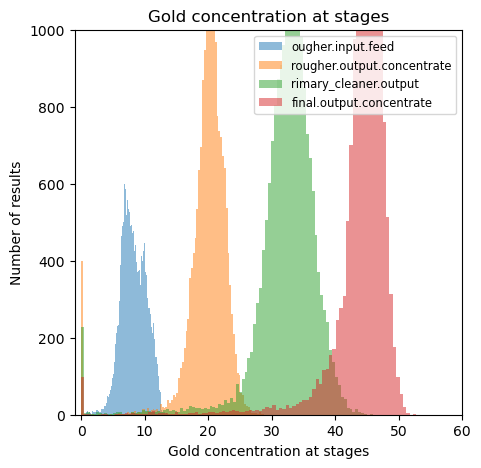

In [20]:
plt.figure(figsize=[5,5])

plt.hist(df_fu['rougher.input.feed_au'], bins=100, label = 'ougher.input.feed', alpha=.5)
plt.hist(df_fu['rougher.output.concentrate_au'], bins=100, label = 'rougher.output.concentrate', alpha=.5)
plt.hist(df_fu['primary_cleaner.output.concentrate_au'], bins=100, label = 'rimary_cleaner.output', alpha=.5)
plt.hist(df_fu['final.output.concentrate_au'], bins=100, label = 'final.output.concentrate', alpha=.5)

plt.xlim([-1, 60])
plt.ylim([0, 1000])

plt.xlabel('Gold concentration at stages')
plt.ylabel('Number of results')

plt.legend(loc='upper right', fontsize= 'small')

plt.title('Gold concentration at stages')
plt.show()

In [21]:
# let's display the figures for Ag concentration at stages: in raw materials, 
# in rough concentrate, concentrate after the first purification and final
mean_conc_input_Ag = df_fu['rougher.input.feed_ag'].mean()
mean_conc_rou_out_Ag = df_fu['rougher.output.concentrate_ag'].mean()
mean_conc_1_cl_Ag = df_fu['primary_cleaner.output.concentrate_ag'].mean()
mean_final_Ag = df_fu['final.output.concentrate_ag'].mean()

print('Average concentration of silver in raw materials:', '%.2f' % mean_conc_input_Ag)
print('Average silver concentration in rough concentrate:', '%.2f' % mean_conc_rou_out_Ag)
print('Average silver concentration after first cleaning:', '%.2f' % mean_conc_1_cl_Ag)
print('Average concentration of silver in the final:', '%.2f' % mean_final_Ag)

Average concentration of silver in raw materials: 8.79
Average silver concentration in rough concentrate: 11.99
Average silver concentration after first cleaning: 8.44
Average concentration of silver in the final: 5.17


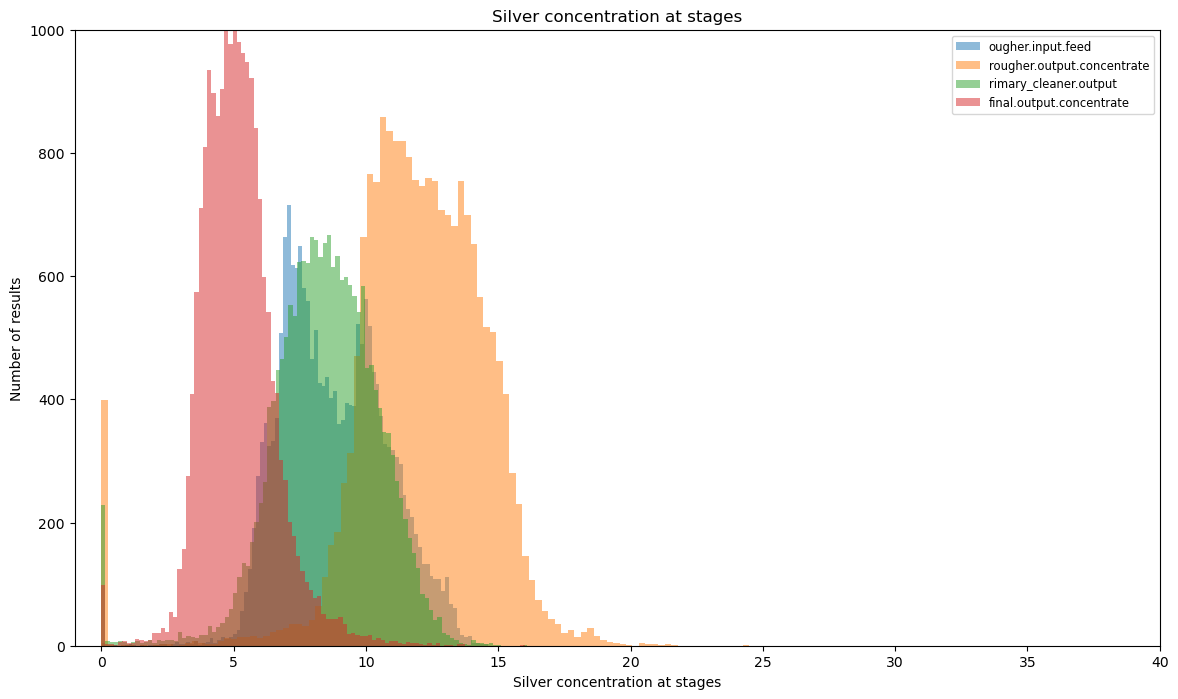

In [22]:
plt.figure(figsize=[14,8])

plt.hist(df_fu['rougher.input.feed_ag'], bins=100, label = 'ougher.input.feed', alpha=.5)
plt.hist(df_fu['rougher.output.concentrate_ag'], bins=100, label = 'rougher.output.concentrate', alpha=.5)
plt.hist(df_fu['primary_cleaner.output.concentrate_ag'], bins=100, label = 'rimary_cleaner.output', alpha=.5)
plt.hist(df_fu['final.output.concentrate_ag'], bins=100, label = 'final.output.concentrate', alpha=.5)

plt.xlim([-1, 40])
plt.ylim([0, 1000])

plt.xlabel('Silver concentration at stages')
plt.ylabel('Number of results')

plt.legend(loc='upper right', fontsize= 'small')

plt.title('Silver concentration at stages')
plt.show()

the average silver content increases after flotation and decreases towards the final product

In [23]:
# Let's display the figures for Pb concentration at stages: in raw materials, in rough concentrate, 
# concentrate after the first purification and final
mean_conc_input_Pb = df_fu['rougher.input.feed_pb'].mean()
mean_conc_rou_out_Pb = df_fu['rougher.output.concentrate_pb'].mean()
mean_conc_1_cl_Pb = df_fu['primary_cleaner.output.concentrate_pb'].mean()
mean_final_Pb = df_fu['final.output.concentrate_pb'].mean()

print('Average lead concentration in raw materials:', '%.2f' % mean_conc_input_Pb)
print('Average lead concentration in rough concentrate:', '%.2f' % mean_conc_rou_out_Pb)
print('Average lead concentration after first cleaning:', '%.2f' % mean_conc_1_cl_Pb)
print('Average lead concentration in the final:', '%.2f' % mean_final_Pb)

Average lead concentration in raw materials: 3.59
Average lead concentration in rough concentrate: 7.61
Average lead concentration after first cleaning: 9.81
Average lead concentration in the final: 9.98


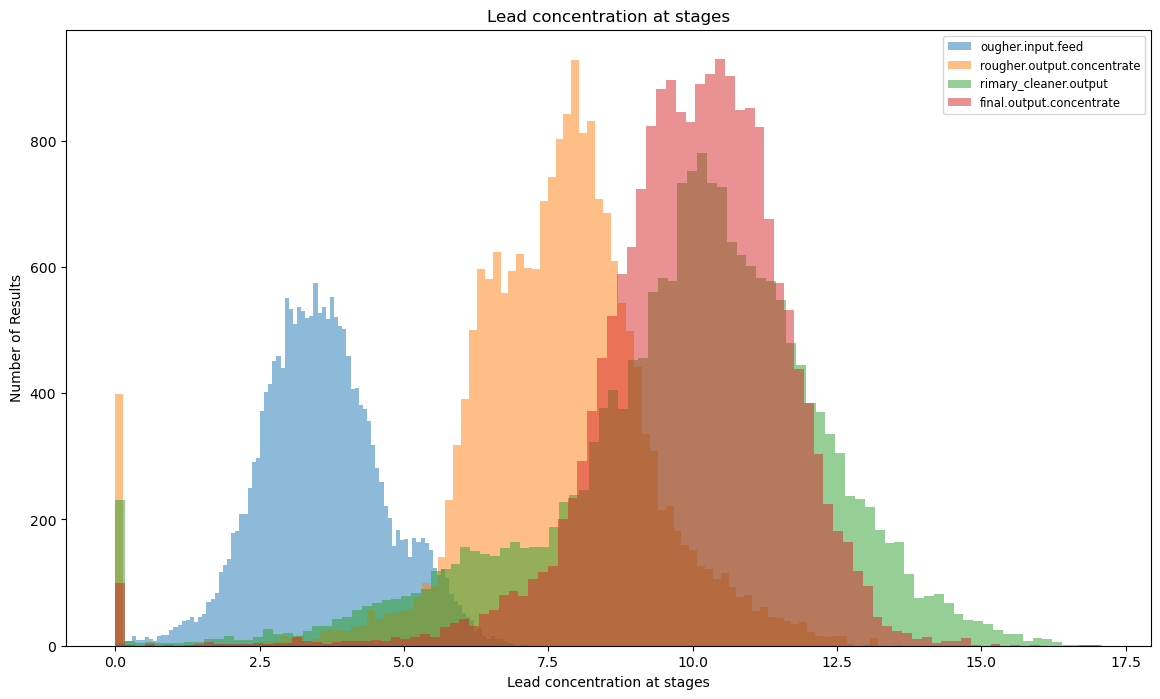

In [24]:
plt.figure(figsize=[14,8])

plt.hist(df_fu['rougher.input.feed_pb'], bins=100, label = 'ougher.input.feed', alpha=.5)
plt.hist(df_fu['rougher.output.concentrate_pb'], bins=100, label = 'rougher.output.concentrate', alpha=.5)
plt.hist(df_fu['primary_cleaner.output.concentrate_pb'], bins=100, label = 'rimary_cleaner.output', alpha=.5)
plt.hist(df_fu['final.output.concentrate_pb'], bins=100, label = 'final.output.concentrate', alpha=.5)

plt.xlabel('Lead concentration at stages')
plt.ylabel('Number of Results')

plt.legend(loc='upper right', fontsize= 'small')

plt.title('Lead concentration at stages')
plt.show()

the average lead concentration increases from stage to stage

Gold has a distribution of values from 0 to > 50, while silver and lead have values ​​ranging from 0 to ~ 20.

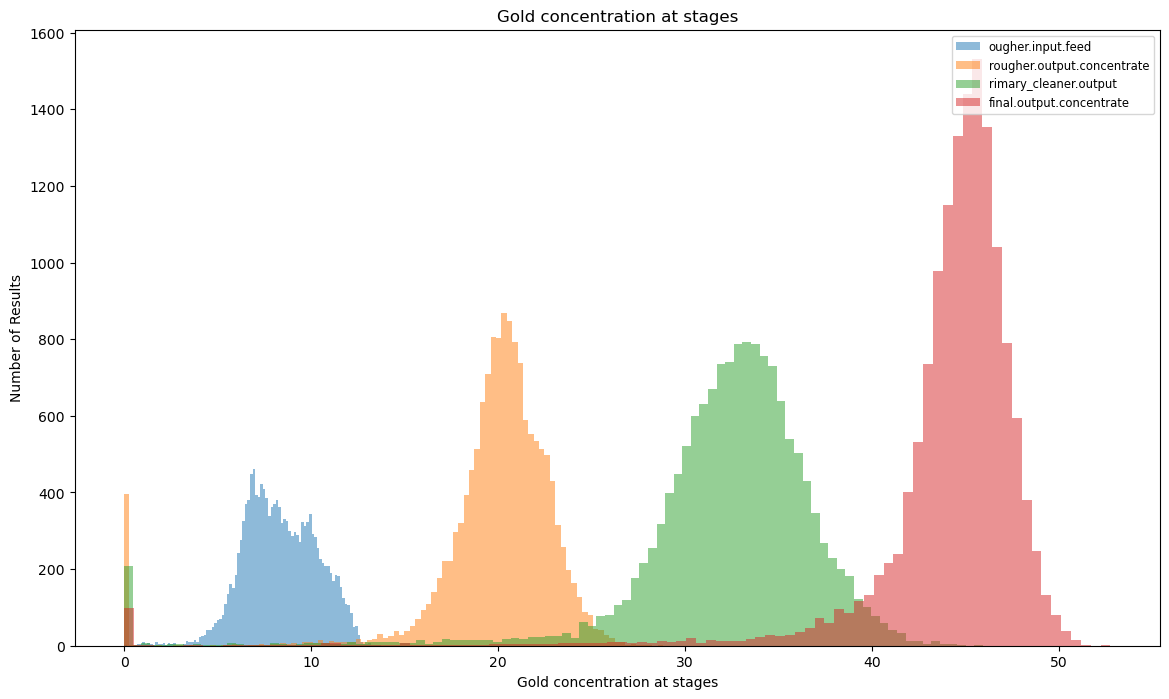

In [25]:
# concentration of au on the training set
plt.figure(figsize=[14,8])

plt.hist(df_tr['rougher.input.feed_au'], bins=100, label = 'ougher.input.feed', alpha=.5)
plt.hist(df_tr['rougher.output.concentrate_au'], bins=100, label = 'rougher.output.concentrate', alpha=.5)
plt.hist(df_tr['primary_cleaner.output.concentrate_au'], bins=100, label = 'rimary_cleaner.output', alpha=.5)
plt.hist(df_tr['final.output.concentrate_au'], bins=100, label = 'final.output.concentrate', alpha=.5)


plt.xlabel('Gold concentration at stages')
plt.ylabel('Number of Results')

plt.legend(loc='upper right', fontsize= 'small')

plt.title('Gold concentration at stages')
plt.show()

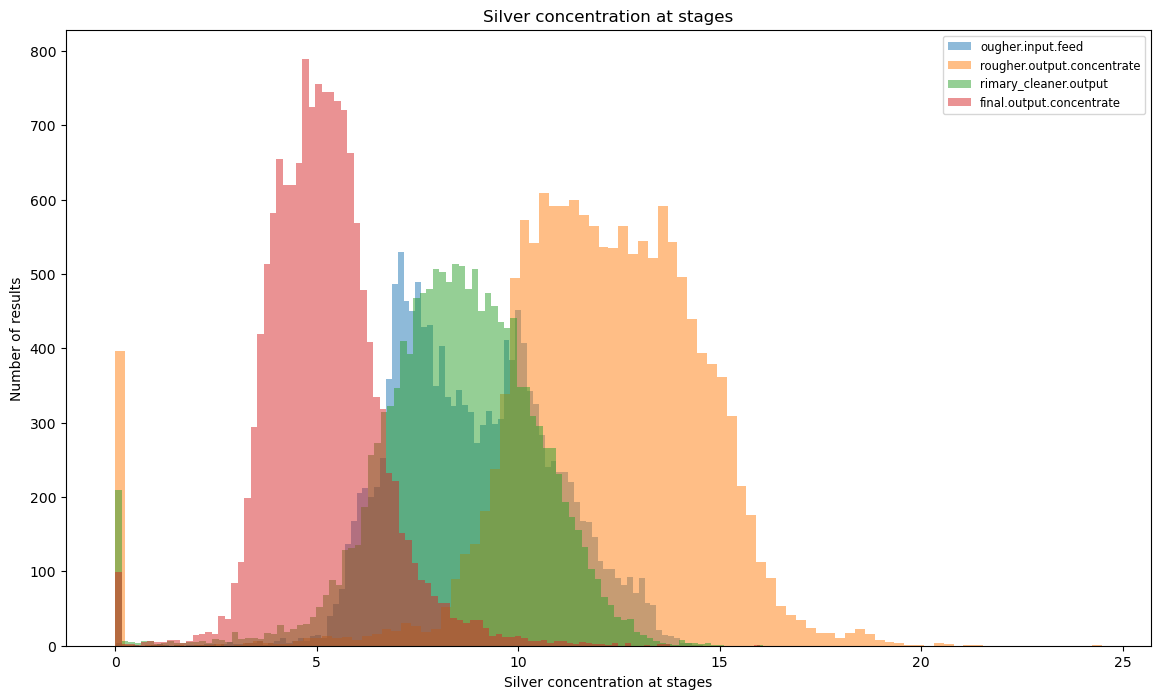

In [26]:
# concentration of ag on the training set
plt.figure(figsize=[14,8])

plt.hist(df_tr['rougher.input.feed_ag'], bins=100, label = 'ougher.input.feed', alpha=.5)
plt.hist(df_tr['rougher.output.concentrate_ag'], bins=100, label = 'rougher.output.concentrate', alpha=.5)
plt.hist(df_tr['primary_cleaner.output.concentrate_ag'], bins=100, label = 'rimary_cleaner.output', alpha=.5)
plt.hist(df_tr['final.output.concentrate_ag'], bins=100, label = 'final.output.concentrate', alpha=.5)

plt.xlabel('Silver concentration at stages')
plt.ylabel('Number of results')

plt.legend(loc='upper right', fontsize= 'small')

plt.title('Silver concentration at stages')
plt.show()

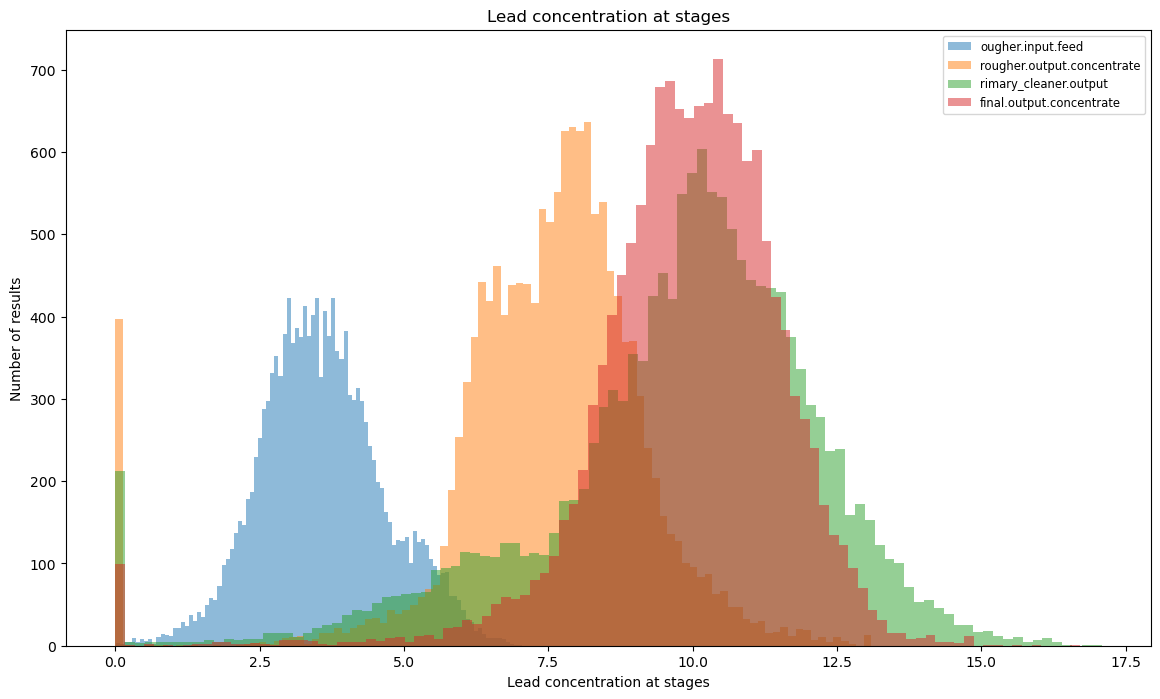

In [27]:
# pb concentration on the training set
plt.figure(figsize=[14,8])

plt.hist(df_tr['rougher.input.feed_pb'], bins=100, label = 'ougher.input.feed', alpha=.5)
plt.hist(df_tr['rougher.output.concentrate_pb'], bins=100, label = 'rougher.output.concentrate', alpha=.5)
plt.hist(df_tr['primary_cleaner.output.concentrate_pb'], bins=100, label = 'rimary_cleaner.output', alpha=.5)
plt.hist(df_tr['final.output.concentrate_pb'], bins=100, label = 'final.output.concentrate', alpha=.5)

plt.xlabel('Lead concentration at stages')
plt.ylabel('Number of results')

plt.legend(loc='upper right', fontsize= 'small')

plt.title('Lead concentration at stages')
plt.show()

In [28]:
# let's calculate exactly the size of emissions towards zero
def left_func(df, column):
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    diff = q3 - q1
    left = q1 - 1.5 * diff
    return left

In [29]:
print(left_func(df_tr, ['rougher.input.feed_au']))
print(left_func(df_tr, ['rougher.output.concentrate_au']))
print(left_func(df_tr, ['primary_cleaner.output.concentrate_au']))
print(left_func(df_tr, ['final.output.concentrate_au']))
print(left_func(df_tr, ['rougher.input.feed_ag']))
print(left_func(df_tr, ['rougher.output.concentrate_ag']))
print(left_func(df_tr, ['primary_cleaner.output.concentrate_ag']))
print(left_func(df_tr, ['final.output.concentrate_ag']))
print(left_func(df_tr, ['rougher.input.feed_pb']))
print(left_func(df_tr, ['rougher.output.concentrate_pb']))
print(left_func(df_tr, ['primary_cleaner.output.concentrate_pb']))
print(left_func(df_tr, ['final.output.concentrate_pb']))


2.5841767518716985
14.621210409367047
23.483426283955094
38.952036560903004
2.9710402020002578
5.871456128467493
3.6777698131435326
1.820063264377311
0.7907804413636517
3.9461233226168475
4.586617022951441
6.286079977817005


Let's remove those that are less than 1. Since if we remove everything up to the left whisker, we will throw out about 18% from the training sample. Of course, a decrease from 14,000 to 12,000 would not seem like a big loss, in my opinion it is quite a lot.

In [30]:
df_tr = df_tr[df_tr['rougher.input.feed_au'] > 1]
df_tr = df_tr[df_tr['rougher.output.concentrate_au'] > 1]  
df_tr = df_tr[df_tr['primary_cleaner.output.concentrate_au'] > 1]
df_tr = df_tr[df_tr['final.output.concentrate_au'] > 1]
df_tr = df_tr[df_tr['rougher.input.feed_ag'] > 1]
df_tr = df_tr[df_tr['rougher.output.concentrate_ag'] > 1]  
df_tr = df_tr[df_tr['primary_cleaner.output.concentrate_ag'] > 1]
df_tr = df_tr[df_tr['final.output.concentrate_ag'] > 1]
df_tr = df_tr[df_tr['rougher.input.feed_pb'] > 0.7]
df_tr = df_tr[df_tr['rougher.output.concentrate_pb'] > 1]  
df_tr = df_tr[df_tr['primary_cleaner.output.concentrate_pb'] > 1]
df_tr = df_tr[df_tr['final.output.concentrate_pb'] > 1]

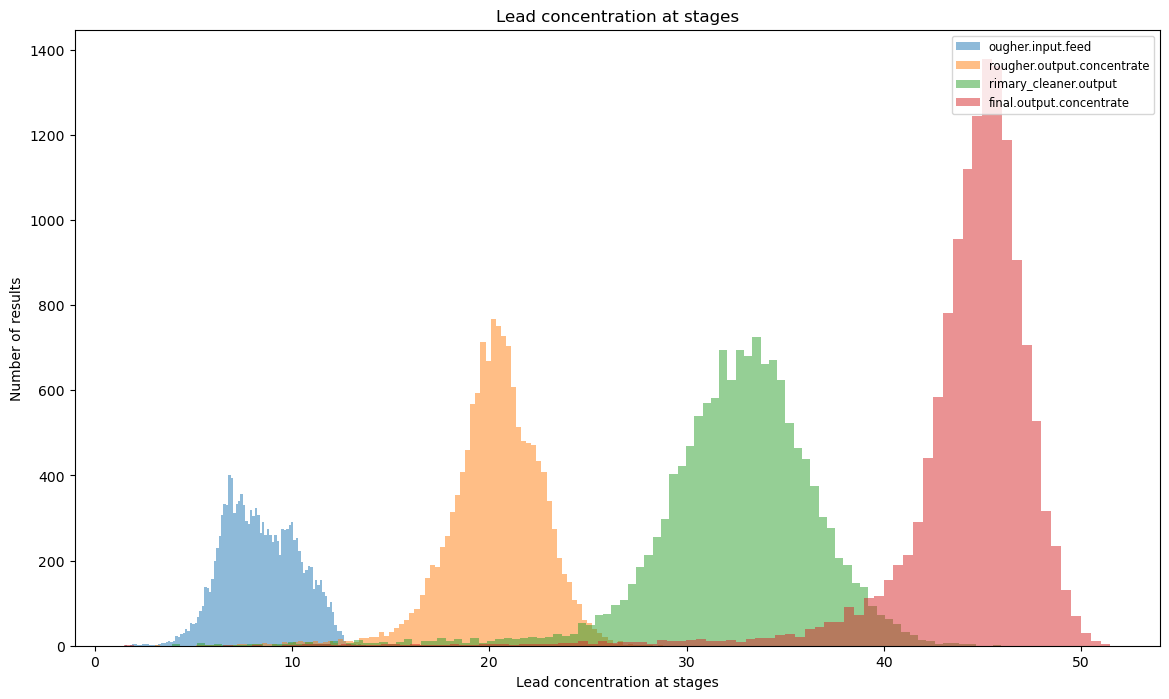

In [31]:
# let's check the absence of emissions on the left on Pb
# concentration of au on the training set
plt.figure(figsize=[14,8])

plt.hist(df_tr['rougher.input.feed_au'], bins=100, label = 'ougher.input.feed', alpha=.5)
plt.hist(df_tr['rougher.output.concentrate_au'], bins=100, label = 'rougher.output.concentrate', alpha=.5)
plt.hist(df_tr['primary_cleaner.output.concentrate_au'], bins=100, label = 'rimary_cleaner.output', alpha=.5)
plt.hist(df_tr['final.output.concentrate_au'], bins=100, label = 'final.output.concentrate', alpha=.5)

plt.xlabel('Lead concentration at stages')
plt.ylabel('Number of results')

plt.legend(loc='upper right', fontsize= 'small')

plt.title('Lead concentration at stages')
plt.show()

#### Comparison of the sizes of raw material granules on the training and test set

In [32]:
# let's do a t-test
import scipy. stats as stats
stats. ttest_ind (a=df_tr['rougher.input.feed_size'], b=df_te['rougher.input.feed_size'])

Ttest_indResult(statistic=-0.5009483050809528, pvalue=0.6164134133911569)

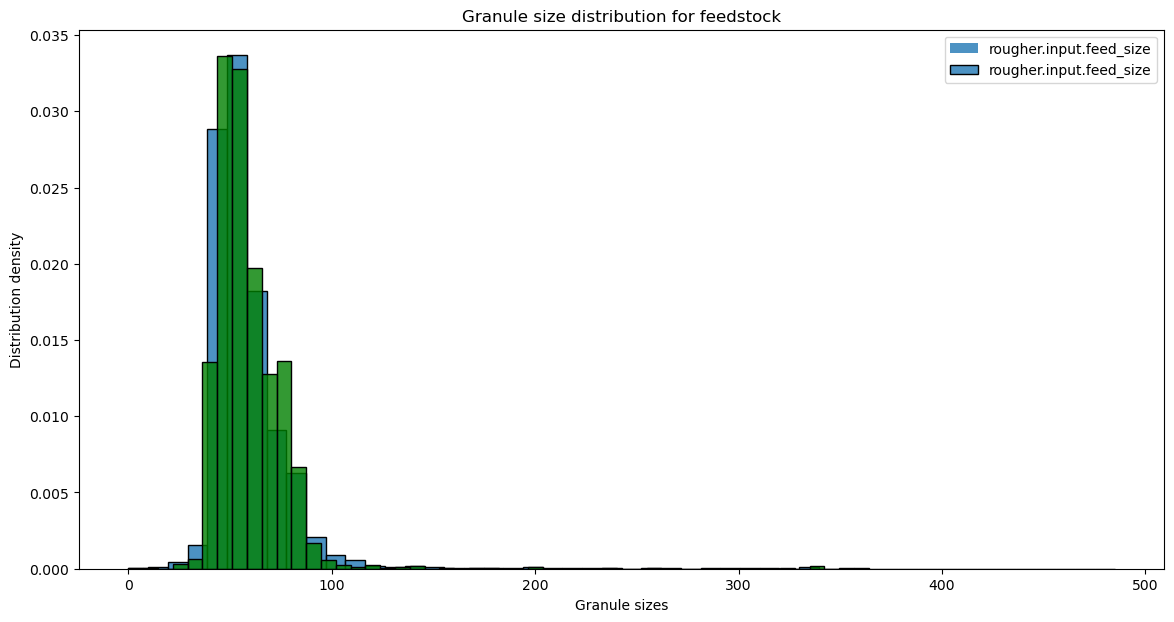

In [33]:
# visualize the distribution of granules during flotation on training and test samples

plt.figure(figsize=(14,7))
sns.histplot(df_tr['rougher.input.feed_size'], stat='density', bins = 50, alpha=0.8)
sns.histplot(df_te['rougher.input.feed_size'], stat='density', bins = 50, color='green', alpha=0.8)

plt.title('Granule size distribution for feedstock')
plt.xlabel('Granule sizes')
plt.ylabel('Distribution density')
plt.legend(['rougher.input.feed_size', 'rougher.input.feed_size'])

plt.show()

In the histogram we see a normal distribution of granules in both samples. There are outliers both to the left - tending to zero, and to the right of the main concentration of the distribution.

#### Total concentration of metals at various stages

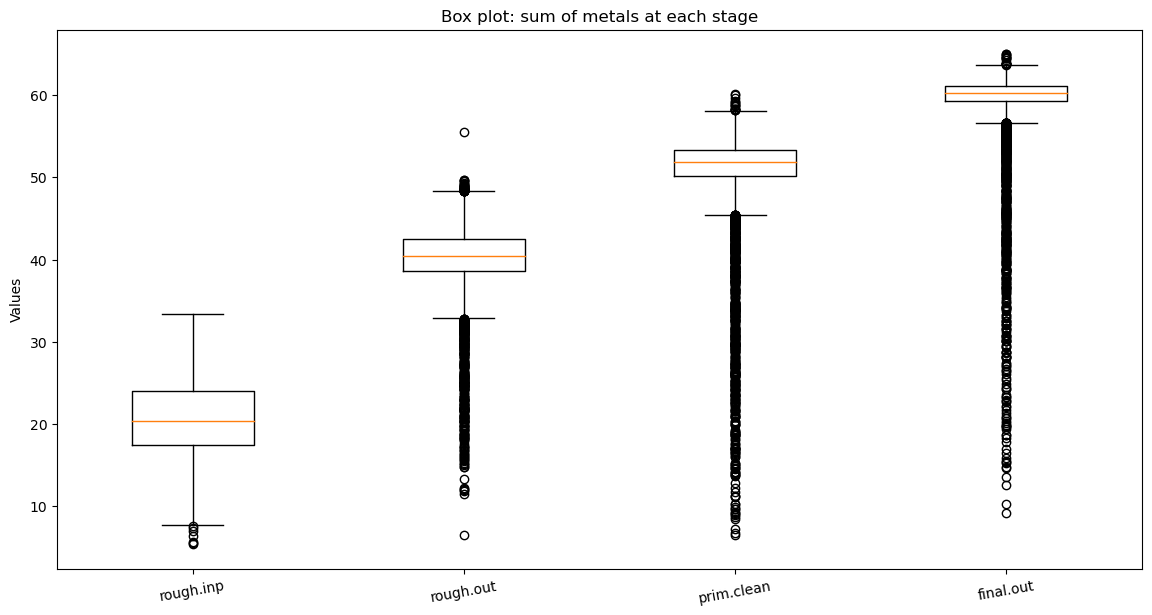

In [34]:
# let's display figures for Au concentration at stages: in raw materials, in rough concentrate, 
# concentrate after the first purification and final
df_tr['rougher.input.feed'] = df_tr['rougher.input.feed_au']+df_tr['rougher.input.feed_ag']+df_tr['rougher.input.feed_pb']
df_tr['rougher.output.concentrate'] = df_tr['rougher.output.concentrate_au']+df_tr['rougher.output.concentrate_ag']+df_tr['rougher.output.concentrate_pb']
df_tr['primary_cleaner.output.concentrate'] = df_tr['primary_cleaner.output.concentrate_au']+df_tr['primary_cleaner.output.concentrate_ag']+df_tr['primary_cleaner.output.concentrate_pb']
df_tr['final.output.concentrate'] = df_tr['final.output.concentrate_au']+df_tr['final.output.concentrate_ag']+df_tr['final.output.concentrate_pb']

x_name = ('rough_inp', 'rough_out', 'prim_clean', 'final_out')

# Box plot

df_tr[['rougher.input.feed', 'rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']]
plt.figure(figsize=(14,7))
plt.boxplot(df_tr[['rougher.input.feed', 'rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']])
plt.xticks([1,2,3,4],['rough.inp', 'rough.out', 'prim.clean', 'final.out'], rotation=10)
plt.title('Box plot: sum of metals at each stage')
plt.ylabel('Values')
plt.show()

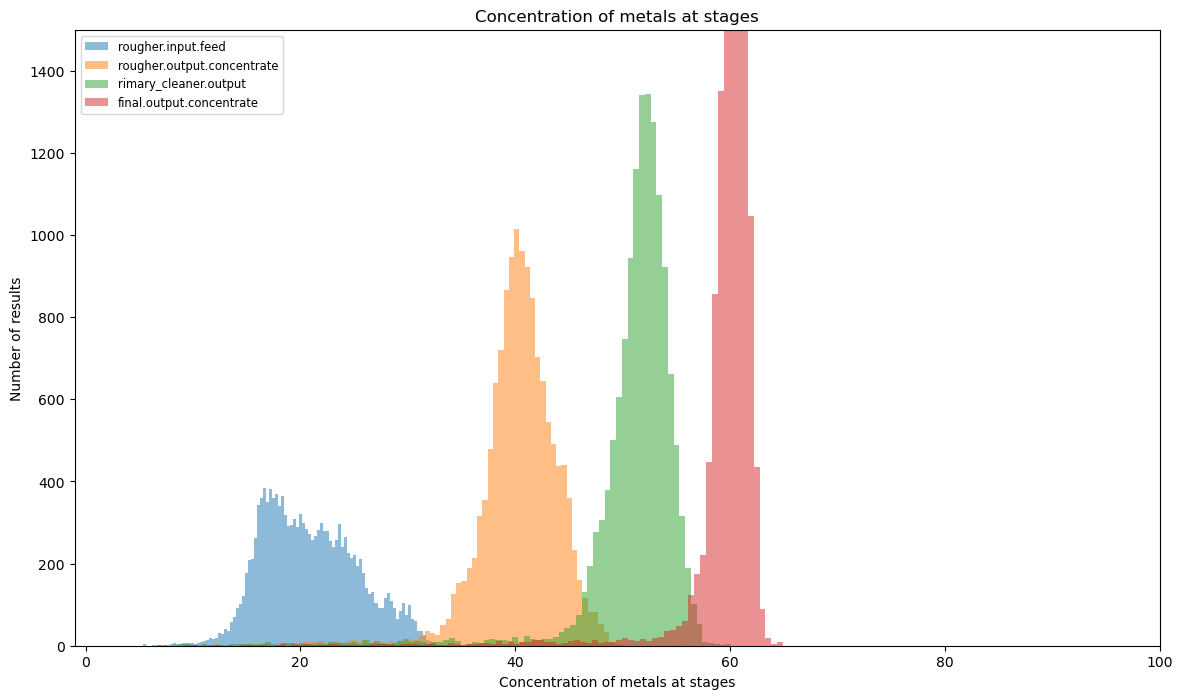

In [35]:
plt.figure(figsize=[14,8])

plt.hist(df_tr['rougher.input.feed'], bins=100, label = 'rougher.input.feed', alpha=.5)
plt.hist(df_tr['rougher.output.concentrate'], bins=100, label = 'rougher.output.concentrate', alpha=.5)
plt.hist(df_tr['primary_cleaner.output.concentrate'], bins=100, label = 'rimary_cleaner.output', alpha=.5)
plt.hist(df_tr['final.output.concentrate'], bins=100, label = 'final.output.concentrate', alpha=.5)

plt.xlim([-1, 100])
plt.ylim([0,1500])

plt.xlabel('Concentration of metals at stages')
plt.ylabel('Number of results')

plt.legend(loc='upper left', fontsize= 'small')

plt.title('Concentration of metals at stages')
plt.show()

The strange emissions that haunted us were not left in 0, since we threw them out at the stage of analyzing the concentration of each type of metal at each stage.

The total concentration of metals increases from stage to stage and the range of dispersion narrows.

### Conclusion

We checked the metal concentrations at different stages. We came to the following conclusions: the average concentration of gold increases from stage to stage (in raw materials - 8.27, in rough concentrate - 19.77, after the first purification - 32.12, in the final - 44.08); the average silver concentration, on the contrary, drops after the rough concentrate stage (in raw materials - 8.79, in rough concentrate - 11.99, after the first purification - 8.44, in the final - 5.17); The average concentration of lead is growing (in raw materials - 3.59, in rough concentrate - 7.61, after the first purification - 9.81, in the final - 9.98). 

We also removed outliers in metal concentrations in the training set, which are less than 1 at all stages of the process.

Comparison of the sizes of granules of the initial raw materials on the training and test samples - in the histogram we see a normal distribution of granules on both samples. There are outliers both to the left - tending to zero, and to the right of the main concentration of the distribution.

We analyzed the total concentration of metals at various stages. The strange emissions that haunted us were not left in 0, since we threw them out at the stage of analyzing the concentration of each type of metal at each stage. The total concentration of metals increases from stage to stage and the range of spread narrows.

## Model

#### Preparing of dataframes for forecasting

In [36]:
df_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4860 non-null   float64
 4   rougher.input.feed_sol                      4860 non-null   float64
 5   rougher.input.feed_rate                     4860 non-null   float64
 6   rougher.input.feed_size                     4860 non-null   float64
 7   rougher.input.floatbank10_sulfate           4860 non-null   float64
 8   rougher.input.floatbank10_xanthate          4860 non-null   float64
 9   rougher.state.floatbank10_a_air             4860 non-null   float64
 10  rougher.stat

In [37]:
# let's introduce variables for target features
y_rougher = 'rougher.output.recovery'
y_final = 'final.output.recovery'

# let's denote it as a list
targets = [y_final, y_rougher]

df_te = df_te.merge(df_fu[['date', 'rougher.output.recovery', 'final.output.recovery']], how='left', on='date')

# display the test sample
df_te.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575,89.514960,70.281454
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,89.858126,65.523246
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155,91.816623,74.817644
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973,88.478959,63.082720
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805,89.230316,74.463380


In [38]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13804 entries, 0 to 14578
Data columns (total 91 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                13804 non-null  object 
 1   rougher.input.feed_au                               13804 non-null  float64
 2   rougher.input.feed_ag                               13804 non-null  float64
 3   rougher.input.feed_pb                               13804 non-null  float64
 4   rougher.input.feed_sol                              13804 non-null  float64
 5   rougher.input.feed_rate                             13804 non-null  float64
 6   rougher.input.feed_size                             13804 non-null  float64
 7   rougher.input.floatbank10_sulfate                   13804 non-null  float64
 8   rougher.input.floatbank10_xanthate                  13804 non-null  float64


In [39]:
# let's bring the training set to the test set based on a set of columns
# let's delete the columns that we found earlier when studying samples, except for targets
for_drop = list(set(list_dif) - set(targets)) # columns to be deleted without target features

df_tr.drop(for_drop, axis=1, inplace=True)

df_tr.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.input.feed,rougher.output.concentrate,primary_cleaner.output.concentrate,final.output.concentrate
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,-498.310211,8.079666,-500.470978,14.151341,-605.841980,70.541216,14.871440,38.395653,53.111627,58.137072
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,-500.169983,7.984757,-500.582168,13.998353,-599.787184,69.266198,14.905729,38.945647,53.174338,58.699942
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,-500.129135,8.013877,-500.517572,14.028663,-601.427363,68.116445,14.638299,38.649756,52.927464,58.927421
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,-499.201640,7.977324,-500.255908,14.005551,-599.996129,68.347543,14.199305,38.411473,43.979185,58.714815
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,-501.686727,7.894242,-500.356035,13.996647,-601.496691,66.927016,13.511497,38.867359,52.121146,59.065251


In [40]:
# delete columns rougher.input.feed, rougher.output.concentrate, 
# primary_cleaner.output.concentrate, final.output.concentrate
df_tr.drop(['rougher.input.feed', 'rougher.output.concentrate', 'primary_cleaner.output.concentrate',
           'final.output.concentrate', 'date'], axis=1, inplace=True)
df_tr.head()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery
0,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,70.541216
1,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,69.266198
2,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,-400.074028,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,68.116445
3,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,-400.200179,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,68.347543
4,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,-399.752729,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,66.927016


we received samples (training) and test with the same set of columns

In [41]:
# et's create the features & target test and train samples
# rough: tr_features_rougher, tr_target_rougher & final: tr_featuters_final, tr_target_final 
tr_features_rougher = df_tr.drop([y_rougher], axis=1)
tr_target_rougher = df_tr[y_rougher]
tr_features_final = df_tr.drop([y_rougher, y_final], axis=1)
tr_target_final = df_tr[y_final]

In [42]:
# display information on rougher
tr_features_rougher.shape, tr_target_rougher.shape

((13804, 53), (13804,))

In [43]:
# display information on final
tr_features_final.shape, tr_target_final.shape

((13804, 52), (13804,))

#### Function for sMAPE and Final sMAPE

In [44]:
#sMAPE
def smape(target, pred):
    error = np.mean(abs(target - pred)/((abs(target)+abs(pred))/2))*100
    return error

In [45]:
#final sMAPE
def final_smape(smape_rougher,smape_final):
    return (0.25*smape_rougher + 0.75*smape_final)

#### Building and training models on training data

##### Training

In [46]:
# let's introduce a counter
scor_smape = make_scorer(smape, greater_is_better=False)

In [47]:
# code LinearRegression
# code for rougher
model_lr_r = LinearRegression()
scores_lr_rougher = cross_val_score(model_lr_r, tr_features_rougher,
                                    tr_target_rougher,
                                    scoring=scor_smape,
                                    cv=5)
smape_rougher = np.mean(abs(scores_lr_rougher))
# code for final
model_lr_f = LinearRegression()
scores_lr_final = cross_val_score(model_lr_f, tr_features_final,
                                    tr_target_final,
                                    scoring=scor_smape,
                                    cv=5)
smape_final = np.mean(abs(scores_lr_final))

print('sMAPE для rougher равен:', '%.4f' % smape_rougher)
print('sMAPE для final равен:', '%.4f' % smape_final)
print('Итоговый sMAPE:', '%.4f' % final_smape(smape_rougher, smape_final))

sMAPE для rougher равен: 6.1753
sMAPE для final равен: 9.5400
Итоговый sMAPE: 8.6989


In [48]:
# code DecisionTreeRegressor
model_dt = DecisionTreeRegressor(random_state=12345)
parameters = {"min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
              "max_depth" : [1,3,5,7,9,11,12]} # let's collect the parameters
grid_r = GridSearchCV(model_dt, param_grid=parameters, cv=3, verbose=5, scoring=scor_smape, n_jobs=-1)
grid_r.fit(tr_features_rougher, tr_target_rougher)
grid_f = GridSearchCV(model_dt, param_grid=parameters, cv=3, verbose=5, scoring=scor_smape, n_jobs=-1)
grid_f.fit(tr_features_final, tr_target_final)


smape_dt_rougher = abs(grid_r.best_score_)
smape_dt_final = abs(grid_f.best_score_)

grid_dt_best_r = grid_r.best_params_
grid_dt_best_f = grid_f.best_params_

print(grid_dt_best_r)
print('sMAPE for rougher equal to:', smape_dt_rougher)
print(grid_dt_best_f)
print('sMAPE for final equal to:', smape_dt_final)
print('final sMAPE for DecisionTree:',final_smape(smape_dt_rougher, smape_dt_final))

Fitting 3 folds for each of 70 candidates, totalling 210 fits
Fitting 3 folds for each of 70 candidates, totalling 210 fits
{'max_depth': 7, 'min_samples_leaf': 10}
sMAPE for rougher equal to: 6.123429257608039
{'max_depth': 1, 'min_samples_leaf': 1}
sMAPE for final equal to: 9.63151096940563
final sMAPE for DecisionTree: 8.754490541456232


In [49]:
# code RandomForestRegressor
model_rf = RandomForestRegressor(random_state=12345)
parameters = {'n_estimators': range(10, 60, 10),
              'max_depth' : [1,3,5,7,9],
              'min_samples_leaf' : [1,3,5,7,9,11]}
grid_r_rf = GridSearchCV(model_rf, param_grid=parameters, cv=3, verbose=10, scoring=scor_smape, n_jobs=-1)
grid_r_rf.fit(tr_features_rougher, tr_target_rougher)
grid_f_rf = GridSearchCV(model_rf, param_grid=parameters, cv=3, verbose=10, scoring=scor_smape, n_jobs=-1)
grid_f_rf.fit(tr_features_final, tr_target_final)


smape_rf_rougher = -grid_r_rf.best_score_
smape_rf_final = -grid_f_rf.best_score_

grid_rf_best_r = grid_r_rf.best_params_
grid_rf_best_f = grid_f_rf.best_params_

print(grid_rf_best_r)
print('sMAPE for rougher equal to:', smape_rf_rougher)
print(grid_rf_best_f)
print('sMAPE for final equal to:', smape_rf_final)
print('final sMAPE for RandomForest:',final_smape(smape_rf_rougher, smape_rf_final))

Fitting 3 folds for each of 150 candidates, totalling 450 fits
Fitting 3 folds for each of 150 candidates, totalling 450 fits
{'max_depth': 7, 'min_samples_leaf': 11, 'n_estimators': 50}
sMAPE for rougher equal to: 5.556399122250159
{'max_depth': 1, 'min_samples_leaf': 1, 'n_estimators': 30}
sMAPE for final equal to: 9.582443856563645
final sMAPE for RandomForest: 8.575932672985275


Conclusion: RandomForestRegressor showed the highest results - sMAPE for rougher is: 5.5563, sMAPE for final is: 9.5824, Final sMAPE: 8.5759. Let's apply this model on a test sample

##### Test sample

In [50]:
# let's create selections features & target for test 
# rough: te_features_rougher, te_target_rougher & final: te_featuters_final, te_target_final 
te_features_rougher = df_te.drop([y_rougher,'date'], axis=1)
te_target_rougher = df_te[y_rougher]
te_features_final = df_te.drop([y_rougher, y_final, 'date'], axis=1)
te_target_final = df_te[y_final]

In [51]:
# display info about rougher
te_features_rougher.shape, te_target_rougher.shape

((4860, 53), (4860,))

In [52]:
# display info about final
te_features_final.shape, te_target_final.shape

((4860, 52), (4860,))

In [53]:
# ML RandomForestRegressor on the test sample
model_rf.fit(tr_features_rougher, tr_target_rougher)
te_pred_r = model_rf.predict(te_features_rougher)

model_rf.fit(tr_features_final, tr_target_final)
te_pred_f = model_rf.predict(te_features_final)


print(te_pred_r)
print(te_pred_f)

[89.05356594 88.64222831 90.5975581  ... 87.31520584 87.52241652
 87.53066207]
[65.42397931 65.31446744 68.09515264 ... 68.919461   70.08291711
 68.88610057]


In [54]:
# final sMAPE on the test sample
final_smape(smape(te_target_rougher, te_pred_r),smape(te_target_final, te_pred_f))

5.233784782963146

##### Checking the model for adequacy

In [55]:
dr_r = DummyRegressor(strategy="median")
dr_f = DummyRegressor(strategy="median")

In [56]:
dr_r.fit(tr_features_rougher,tr_target_rougher)
dr_f.fit(tr_features_final,tr_target_final)

DummyRegressor(strategy='median')

In [57]:
pred_r = dr_r.predict(te_features_rougher)
pred_f = dr_f.predict(te_features_rougher)

In [58]:
final_smape(smape(te_target_rougher, pred_r), smape(te_target_final, pred_f))

8.295097097406776

Conclusion:
When analyzing the samples, we noticed a discrepancy in the number of train and test columns. In the test sample there is no data with final results, since in real conditions when using the model we will know the initial input data about raw materials, granule sizes, etc. The rest of the data should already be predicted by the model.

In addition, in all samples we saw missing values in the cells; we prefilled them with values from neighboring cells, since the values were close. 

When comparing the concentration of metals at different stages, an increase in the concentration of gold towards the final stage was noted. In addition, we noticed that there are outliers - values close to zero. We counted outliers by removing all values less than 1. If we removed outliers up to the left whisker, the sample was reduced by approximately 18%.

A comparison of the feedstock granules on trai and test showed that the granules are approximately the same.

We prepared samples for working with the model. We compared the training and test samples by the number of columns, and added columns with target features to the test set from the full sample. 

Trained Logistic Regression, Decision Tree and Random Forest. RandomForestRegressor showed the best result; when transferred to the test, the result increased to 5.23. The result of the constant model was 8.30.
